In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/sme-invoicing-assistant


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/sme-invoicing-assistant/.env


True

In [4]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("results/gpt-4o-mini-gpt-4o-mini/emails.db")
# conn = sqlite3.connect("src/data/db/llama3.2-vision_11b-qwen2.5_32b/emails.db")

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:01.661961,2025-01-21T21:54:23.614651,21.9527,8,2894,2596,298,0.0005682
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:23.616947,2025-01-21T21:54:35.695285,12.0783,28,9996,8948,1048,0.001971
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:35.696824,2025-01-21T21:54:44.353607,8.6568,60,21313,19060,2253,0.0042108
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:44.356464,2025-01-21T21:54:55.421207,11.0647,104,36838,32930,3908,0.0072843
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:55.423148,2025-01-21T21:55:02.572704,7.1496,160,56570,50558,6012,0.0111909


In [5]:
import json

json_file = "results/gpt-4o-mini-gpt-4o-mini/full_logs.json"

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)
    conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
    conn.execute("VACUUM")
    conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs loaded from results/gpt-4o-mini-gpt-4o-mini/full_logs.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  total_time           2000 non-null   object
 11  successful_requests  2000 non-null   object
 12  total_tokens         2000 non-null   object
 13  prompt_tokens        2000 non-null   object
 14  completion_tokens    2000 non-null   object
 15  total_cost           2000 non-null   object
dtypes: obj

In [7]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,508,2000,2000,1940,2000,2000,2000,2000,2000
top,93185A89130149C0A842968E4AFDCAA2,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Hi Tanya ! Please find attached payment screen...,,SUCCESS,"{""content"": ""DONE""}",2025-01-21T21:54:01.661961,2025-01-21T21:54:23.614651,1.8148,8,2894,2596,298,0.0005682
freq,1,3,2000,3,1,1000,981,981,1,1,3,1,1,1,1,1


In [8]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

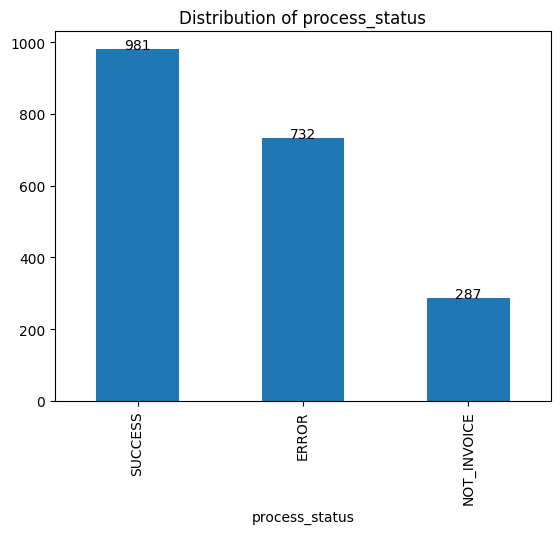

In [9]:
plot_value_distribution(df, "process_status")

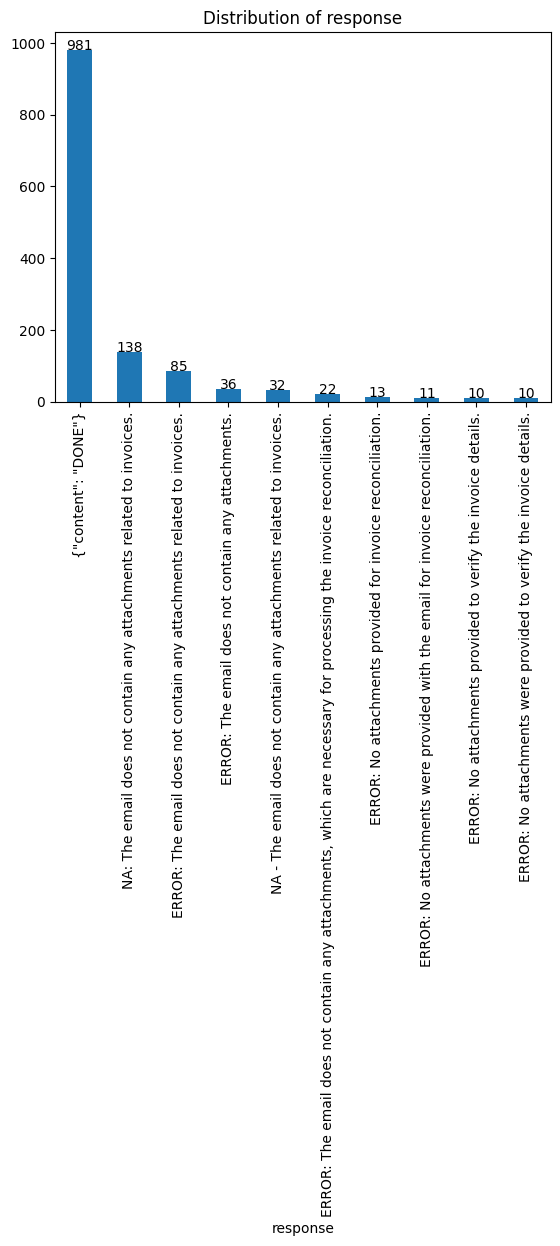

In [10]:
plot_value_distribution(df, "response")

In [11]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [12]:
df[["duration", "total_time"]].head()

,duration,total_time
0,21.952690,21.9527
1,12.078338,12.0783
2,8.656783,8.6568
3,11.064743,11.0647
4,7.149556,7.1496


<Axes: ylabel='Frequency'>

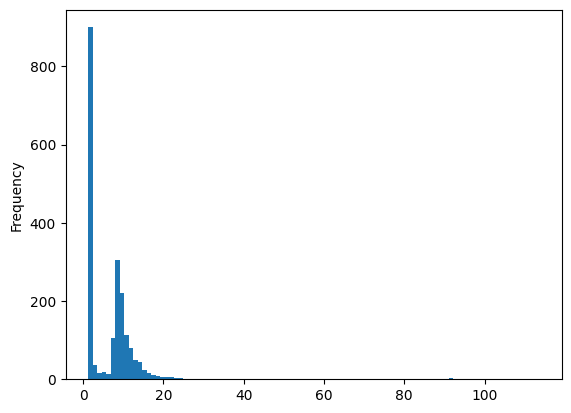

In [13]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [14]:
df[df["duration"] > 48]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration
160,CC9187A295514E7E93C33B0D257B1B90,BrittneyGrimes@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 37532,Hi Tanya ! Please find attached payment screen...,transaction_161.jpeg,ERROR,ERROR The invoice ID 37532 is currently marked...,2025-01-21 22:25:30.951047,2025-01-21 22:27:24.530178,113.5791,160786,62991118,56841496,6149622,12.2137608,113.579131
223,6FDBAEDB9C434B458A6B77AD5771B46C,ChadKing@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 14603,Hi Tanya ! Please find attached payment screen...,transaction_224.jpeg,ERROR,ERROR The invoice with ID 14603 is currently i...,2025-01-21 22:40:35.145636,2025-01-21 22:41:50.673489,75.5279,319615,130747786,118784011,11963775,24.70937385,75.527853
523,68662D82CC0E44D0B072750F2E51F308,DarrellFernandez@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 66153,Hi Tanya ! Please find attached payment screen...,transaction_524.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21 23:31:55.129718,2025-01-21 23:33:26.038003,90.9083,1814883,778571548,712008298,66563250,143.251092299999,90.908285
581,76898E00ACAE41CCA3B33DE5F5364CFE,RobertoHoltMD@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 63536,Hi Tanya ! Please find attached payment screen...,transaction_582.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21 23:42:47.837373,2025-01-21 23:44:33.461238,105.6239,2242476,960766536,878386340,82380196,177.024977399999,105.623865
622,0454744041EF4749820C47DDF7CCC6A8,BradThompson@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 95153,Hi Tanya ! Please find attached payment screen...,transaction_623.jpeg,NOT_INVOICE,NA: The email and OCR data do not contain any ...,2025-01-21 23:51:14.084325,2025-01-21 23:52:47.631053,93.5467,2573791,1107191051,1012764790,94426261,203.456084699999,93.546728
645,274E385B6C584F95862A774EB865153E,ChristopherPoole@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 39760,Hi Tanya ! Please find attached payment screen...,transaction_646.jpeg,ERROR,ERROR: The invoice ID 39760 is currently marke...,2025-01-21 23:56:26.458997,2025-01-21 23:57:32.396627,65.9376,2768754,1192929758,1091404218,101525540,218.973092699999,65.937630
727,4E1390DB308D42038A27EB79B6235FC1,JillianCole@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 24173,Hi Tanya ! Please find attached payment screen...,transaction_728.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22 00:12:10.564374,2025-01-22 00:13:55.048448,104.4841,3532812,1533605045,1404534149,129070896,279.92642955,104.484074
796,4BC2D249A66745EAAD185EDFABDDC838,TaraWest@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 16691,Hi Tanya ! Please find attached payment screen...,transaction_797.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22 00:26:11.529202,2025-01-22 00:28:02.079694,110.5505,4243235,1847615142,1692851130,154764012,336.398627100001,110.550492
894,A07B16164A9145AC92198F212797C313,KristiKrause@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 66740,Hi Tanya ! Please find attached payment screen...,transaction_895.jpeg,ERROR,ERROR: The invoice ID 66740 is in the database...,2025-01-22 00:44:44.877767,2025-01-22 00:46:21.326681,96.4489,5365510,2341848032,2146278850,195569182,425.726869500001,96.448914
938,0963EC66A2054E3DB2EE013B0F382BBE,WandaAnderson@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43064,Hi Tanya ! Please find attached payment screen...,transaction_939.jpeg,ERROR,ERROR: The invoice ID 43064 is in the database...,2025-01-22 00:53:22.586524,2025-01-22 00:54:17.803124,55.2166,5915543,2589540858,2374221796,215319062,469.769394600002,55.2

In [15]:
df["duration"].describe()

count    2000.000000
mean        6.844329
std         8.544340
min         1.281016
25%         1.684894
50%         7.382663
75%         9.642589
max       113.579131
Name: duration, dtype: float64

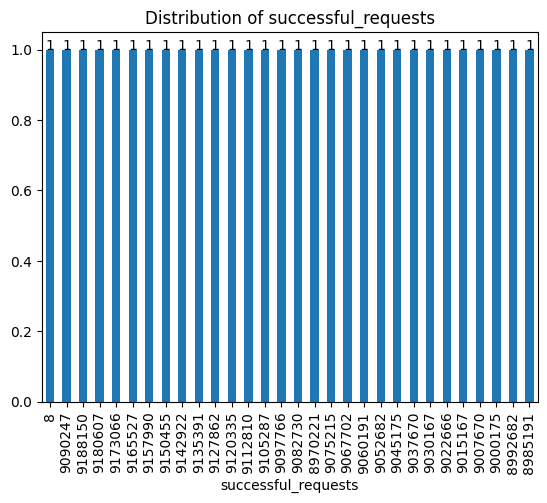

In [16]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [17]:
df["process_status"].value_counts()

process_status
SUCCESS        981
ERROR          732
NOT_INVOICE    287
Name: count, dtype: int64

In [18]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.4905

In [19]:
mean_response_time = df["duration"].mean()
mean_response_time

6.844329179000001

In [20]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-22 00:27:47.662482432,2025-01-22 00:27:54.506811392,6.844329
min,2025-01-21 21:54:01.661961,2025-01-21 21:54:23.614651,1.281016
25%,2025-01-21 23:28:22.007579648,2025-01-21 23:28:30.753465856,1.684894
50%,2025-01-22 01:04:01.813874944,2025-01-22 01:04:07.920537088,7.382663
75%,2025-01-22 01:24:43.360384512,2025-01-22 01:24:44.811434496,9.642589
max,2025-01-22 01:44:18.186340,2025-01-22 01:44:19.659469,113.579131
std,NaN,NaN,8.544340


In [21]:
row = df[df["process_status"] == "ERROR"].iloc[0]
row

email_id                                857F389B11B1455CB772EB05645946C7
sender_email                                    JoshuaWilson@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 83634
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                          transaction_86.jpeg
process_status                                                     ERROR
response               ERROR: The invoice ID 83634 is currently marke...
start_time                                    2025-01-21 22:09:39.646221
end_time                                      2025-01-21 22:09:54.456948
total_time                                                       14.8107
successful_requests                                                45183
total_tokens                                                    17233431
prompt_tokens                                      

In [22]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: RobinLevine@example.com\n            Subject: Payment Confirmation for Invoice ID: 43925\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 43925 , Regards Robin Levine\n            Attachment: transaction_1.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
 'timestamp': '2025-01-22T01:44:18.186340',
 'usage': {'input_tokens': 0,
  'output_tokens': 0,
  'total_tokens': 0,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}},
 'model_name': '',
 'additional_kwargs': {}}

In [23]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

774


In [24]:
full_logs[i : i + 5]

[{'name': 'input',
  'type': 'HumanMessage',
  'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: JoshuaWilson@example.com\n            Subject: Payment Confirmation for Invoice ID: 83634\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 83634 , Regards Joshua Wilson\n            Attachment: transaction_86.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
  'timestamp': '2025-01-22T01:44:18.186340',
  'usage': {'input_tokens': 0,
   'output_tokens': 0,
   'total_tokens': 0,
   'input_token_details': {'audio': 0, 'cache_read': 0},
   'output_token_details': {'audio': 0, 'reasoning': 0}},
  'model_name': '',
  'additional_kwargs': {}},
 {'name': 'finance_clerk',
  'type': 'AIMessage',
  'content': 'Tool calls to ocr_tool',
  'timestamp': '2025-01-21T22:09:40.768625',
  'usage': {'input_tokens': 196,
   'output_tokens': 20,
   'total_tokens': 216,
   'inp

In [41]:
from src.misc.metrics import *

get_metrics(df)

{'task_completion_rate': 1,
 'task_success_rate': 0.4905,
 'mean_execution_time': 6.844329179000001}

In [42]:
len(df[df["attachments"] == ""]), len(df[df["attachments"] != ""])

(1000, 1000)

In [43]:
df_vision = df[df["attachments"] != ""].copy()
get_metrics(df_vision)

{'task_completion_rate': 1,
 'task_success_rate': 0.972,
 'mean_execution_time': 11.364913326}

In [44]:
df_no_vision = df[df["attachments"] == ""].copy()
get_metrics(df_no_vision)

{'task_completion_rate': 1,
 'task_success_rate': 0.009,
 'mean_execution_time': 2.3237450319999997}

In [45]:
df_no_vision[df_no_vision["process_status"] != "SUCCESS"].head()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration,duration_hms
1000,2afa6f82-36dc-4b92-a725-c9c16e959258,kevinfoster@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I14982,Subject: Payment Confirmation for Invoice I149...,,ERROR,ERROR: NO ATTACHMENTS,2025-01-22 01:04:07.125094,2025-01-22 01:04:08.767959,1.6429,6730216,2959499479,2714949118,244550361,535.412136300002,1.642865,0 days 00:00:01
1001,5376b526-c50b-418d-9825-107fb3699c24,roger48@example.org,tanya.official.456@gmail.com,Payment Confirmation for Invoice I11103,Subject: Payment Confirmation for Invoice I111...,,ERROR,ERROR: The email does not contain any attachme...,2025-01-22 01:04:08.835452,2025-01-22 01:04:10.801846,1.9664,6737032,2962589953,2717794752,244795201,535.961453400002,1.966394,0 days 00:00:01
1002,4c6f3f11-734c-421c-a3fa-1145dcd9930c,fergusonerica@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I12431,Subject: Payment Confirmation for Invoice I124...,,ERROR,ERROR: The email does not contain any attachme...,2025-01-22 01:04:10.867905,2025-01-22 01:04:12.752367,1.8845,6743850,2965681273,2720641209,245040064,536.510907750003,1.884462,0 days 00:00:01
1003,2db38ad9-41f6-4671-93c2-7392b997027b,owhite@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I16676,Subject: Payment Confirmation for Invoice I166...,,ERROR,ERROR: The email does not contain any attachme...,2025-01-22 01:04:12.808907,2025-01-22 01:04:14.395325,1.5864,6750670,2968773430,2723488483,245284947,537.060496650003,1.586418,0 days 00:00:01
1004,36fc024b-16f5-4be9-a9b0-7446edc730af,simonandrew@example.org,tanya.official.456@gmail.com,Payment Confirmation for Invoice I12240,Subject: Payment Confirmation for Invoice I122...,,ERROR,ERROR: The email does not contain any attachme...,2025-01-22 01:04:14.569466,2025-01-22 01:04:16.209521,1.6401,6757492,2971866436,2726336580,245529856,537.610224600003,1.640055,0 days 00:00:01


In [46]:
print_row_details(
    df_no_vision[df_no_vision["process_status"] != "SUCCESS"],
    columns=["process_status", "email_body", "response"],
)

--------------------------------------------------
process_status: ERROR
--------------------------------------------------
email_body: Subject: Payment Confirmation for Invoice I14982
                John Lee <kevinfoster@example.com>
                Sun, Jan 05, 2025, 10:04 AM
                Dear Tanya, I hope this message finds you well.I am writing to confirm that we have successfully made the payment for Invoice I14982, related to our recent order with you. Here are the details:  
                Description:
                Invoice Date: December 21, 2024
                Item: Office Wear Suits
                Quantity: 2
                Subtotal: $372.31
                Tax (10%): $37.23
                Shipping (if applicable): $12.91
                Total Amount paid: $422.45
                Transaction Reference Number - TXN-MST-201-218694
                Thank you and I look forward to our continued business
                Best regards,
                John Lee
-----------